# Heart Disease Prediction: Classification Project

### Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import graphviz

### Load data and store into Panda DataFrame objects

In [2]:
df = pd.read_csv (r'/Users/sarahlueling/Desktop/Intro to ML/HeartDiseaseTrain-Test.csv')
print (df)

      age     sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0      52    Male   Typical angina                     125          212   
1      53    Male   Typical angina                     140          203   
2      70    Male   Typical angina                     145          174   
3      61    Male   Typical angina                     148          203   
4      62  Female   Typical angina                     138          294   
...   ...     ...              ...                     ...          ...   
1020   59    Male  Atypical angina                     140          221   
1021   60    Male   Typical angina                     125          258   
1022   47    Male   Typical angina                     110          275   
1023   50  Female   Typical angina                     110          254   
1024   54    Male   Typical angina                     120          188   

         fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0       Lower than 120 mg/ml

In [3]:
pd.DataFrame(df)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [4]:
from collections import Counter
Counter(pd.DataFrame(df)['target'].values)

Counter({0: 499, 1: 526})

# Dataset Information

In [5]:
df.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
5,58,Female,Typical angina,100,248,Lower than 120 mg/ml,Normal,122,No,1.0,Flat,Zero,Fixed Defect,1
6,58,Male,Typical angina,114,318,Lower than 120 mg/ml,Left ventricular hypertrophy,140,No,4.4,Upsloping,Three,Normal,0
7,55,Male,Typical angina,160,289,Lower than 120 mg/ml,Normal,145,Yes,0.8,Flat,One,Reversable Defect,0
8,46,Male,Typical angina,120,249,Lower than 120 mg/ml,Normal,144,No,0.8,Downsloping,Zero,Reversable Defect,0
9,54,Male,Typical angina,122,286,Lower than 120 mg/ml,Normal,116,Yes,3.2,Flat,Two,Fixed Defect,0


In [6]:
len(df)

1025

In [7]:
list(df.columns)

['age',
 'sex',
 'chest_pain_type',
 'resting_blood_pressure',
 'cholestoral',
 'fasting_blood_sugar',
 'rest_ecg',
 'Max_heart_rate',
 'exercise_induced_angina',
 'oldpeak',
 'slope',
 'vessels_colored_by_flourosopy',
 'thalassemia',
 'target']

The some names aren't really understandable. We will clean in next section.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

We need to the objects this into numeric data to be able to use specific classifiers. Thus, we will pre-process data for the following rows. sex, chest_pain_type, fasting_blood_sugar, rest_ecg, exercise_induced_angina, exercise_induced_angina, slope, vessels_colored_by_flourosopy, thalassemia

In [9]:
print(df.isnull().sum())

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


No missing data so we don't have to replace an observation points

In [10]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [11]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

# Data Cleaning

## Rename Features

So the data is easier to understand

In [12]:
df.columns = ['age',
 'sex',
 'chest_pain_type',
 'resting_blood_pressure',
 'cholestoral',
 'fasting_blood_sugar',
 'resting_electrocardiogram',
 'max_heart_rate',
 'exercise_induced_angina',
 'exercise_relative_to_rest',
 'peak_heart_rate_slope',
 'vessels_colored_by_flourosopy',
 'thalassemia_level',
 'target']

In [13]:
list(df.columns)

['age',
 'sex',
 'chest_pain_type',
 'resting_blood_pressure',
 'cholestoral',
 'fasting_blood_sugar',
 'resting_electrocardiogram',
 'max_heart_rate',
 'exercise_induced_angina',
 'exercise_relative_to_rest',
 'peak_heart_rate_slope',
 'vessels_colored_by_flourosopy',
 'thalassemia_level',
 'target']

# Data Preprocessing

We need to encode target labels with value between 0 and n_classes-1 so that the computer can understand the values when creating specific classifiers.

In [14]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_chest_pain_type = LabelEncoder()
le_fasting_blood_sugar = LabelEncoder()
le_resting_electrocardiogram = LabelEncoder()
le_exercise_induced_angina = LabelEncoder()
le_peak_heart_rate_slope = LabelEncoder()
le_vessels_colored_by_flourosopy = LabelEncoder()
le_thalassemia_level = LabelEncoder()

In [51]:
df['sex_n'] = le_sex.fit_transform(df['sex'])
df['chest_pain_type_n'] = le_chest_pain_type.fit_transform(df['chest_pain_type'])
df['fasting_blood_sugar_n'] = le_fasting_blood_sugar.fit_transform(df['fasting_blood_sugar'])
df['resting_electrocardiogram_n'] = le_resting_electrocardiogram.fit_transform(df['resting_electrocardiogram'])
df['exercise_induced_angina_n'] = le_exercise_induced_angina.fit_transform(df['exercise_induced_angina'])
df['peak_heart_rate_slope_n'] = le_peak_heart_rate_slope.fit_transform(df['peak_heart_rate_slope'])
df['vessels_colored_by_flourosopy_n'] = le_vessels_colored_by_flourosopy.fit_transform(df['vessels_colored_by_flourosopy'])
df['thalassemia_level_n'] = le_thalassemia_level.fit_transform(df['thalassemia_level'])

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate,exercise_induced_angina,exercise_relative_to_rest,...,thalassemia_level,target,sex_n,chest_pain_type_n,fasting_blood_sugar_n,resting_electrocardiogram_n,exercise_induced_angina_n,peak_heart_rate_slope_n,vessels_colored_by_flourosopy_n,thalassemia_level_n
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,...,Reversable Defect,0,1,3,1,2,0,0,3,3
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,...,Reversable Defect,0,1,3,0,1,1,2,4,3
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,...,Reversable Defect,0,1,3,1,2,1,2,4,3
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,...,Reversable Defect,0,1,3,1,2,0,0,1,3
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,...,Fixed Defect,0,0,3,0,2,0,1,2,0


Drop the old columns with string values

In [16]:
df1 = df.drop(columns=['sex' , 'chest_pain_type' , 'fasting_blood_sugar' , 'resting_electrocardiogram' , 'exercise_induced_angina' , 'peak_heart_rate_slope' , 'vessels_colored_by_flourosopy' , 'thalassemia_level'])

Now rename the columns back to the original name

In [17]:
df1.rename({"sex_n": "sex", 
           "chest_pain_type_n": "chest_pain_type", 
           "fasting_blood_sugar_n": "fasting_blood_sugar",
           "resting_electrocardiogram_n": "resting_electrocardiogram", 
           "exercise_induced_angina_n": "exercise_induced_angina", 
           "peak_heart_rate_slope_n": "peak_heart_rate_slope",
           "vessels_colored_by_flourosopy_n": "vessels_colored_by_flourosopy",
           "thalassemia_level_n": "thalassemia_level"}, 
          axis = "columns", inplace = True)
df1.head()

,age,resting_blood_pressure,cholestoral,max_heart_rate,exercise_relative_to_rest,target,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiogram,exercise_induced_angina,peak_heart_rate_slope,vessels_colored_by_flourosopy,thalassemia_level
0,52,125,212,168,1.0,0,1,3,1,2,0,0,3,3
1,53,140,203,155,3.1,0,1,3,0,1,1,2,4,3
2,70,145,174,125,2.6,0,1,3,1,2,1,2,4,3
3,61,148,203,161,0.0,0,1,3,1,2,0,0,1,3
4,62,138,294,106,1.9,0,0,3,0,2,0,1,2,0


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   resting_blood_pressure         1025 non-null   int64  
 2   cholestoral                    1025 non-null   int64  
 3   max_heart_rate                 1025 non-null   int64  
 4   exercise_relative_to_rest      1025 non-null   float64
 5   target                         1025 non-null   int64  
 6   sex                            1025 non-null   int64  
 7   chest_pain_type                1025 non-null   int64  
 8   fasting_blood_sugar            1025 non-null   int64  
 9   resting_electrocardiogram      1025 non-null   int64  
 10  exercise_induced_angina        1025 non-null   int64  
 11  peak_heart_rate_slope          1025 non-null   int64  
 12  vessels_colored_by_flourosopy  1025 non-null   i

Great! Now now all dtypes are numeric

# Create Target and Feature Data

In [24]:
X = df1.drop(['target'],axis='columns')
X.head()

,age,resting_blood_pressure,cholestoral,max_heart_rate,exercise_relative_to_rest,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiogram,exercise_induced_angina,peak_heart_rate_slope,vessels_colored_by_flourosopy,thalassemia_level
0,52,125,212,168,1.0,1,3,1,2,0,0,3,3
1,53,140,203,155,3.1,1,3,0,1,1,2,4,3
2,70,145,174,125,2.6,1,3,1,2,1,2,4,3
3,61,148,203,161,0.0,1,3,1,2,0,0,1,3
4,62,138,294,106,1.9,0,3,0,2,0,1,2,0


In [25]:
y = pd.DataFrame(df1, columns = ['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [26]:
type(X), X.shape

(pandas.core.frame.DataFrame, (1025, 13))

In [27]:
type(y), y.shape

(pandas.core.frame.DataFrame, (1025, 1))

# Create Test and Training Data

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y,test_size=0.2,random_state=42)

In [29]:
X_train.shape

(820, 13)

In [30]:
X_test.shape

(205, 13)

In [31]:
y_train.shape

(820, 1)

In [32]:
y_test.shape

(205, 1)

# Machine Learning Models

# Decision Tree Classification

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
cart = DecisionTreeClassifier(criterion='entropy', random_state = 42)
cart_model = cart.fit(X_train, y_train)

In [34]:
y_pred = cart_model.predict(X_test)
testscore_cart=accuracy_score(y_test, y_pred)
cart1 = accuracy_score(y_test, y_pred)
cart1

0.9707317073170731

# Compare results for accuracy

In [35]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [36]:
y_test_v = y_test.values.reshape(1,len(y_test))[0]
y_test_v

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [37]:
y_pred == y_test_v

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(penalty='l2',solver='liblinear')
lr = model_1.fit(X_train, y_train.values.ravel())
lra=model_1.score(X_test, y_test)
lra

0.8155339805825242

In [54]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0])

In [57]:
y_test_z = y_test.values.reshape(1,len(y_test))[0]
y_test_z

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [58]:
y_test_z==y_pred_lr

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(criterion='entropy', random_state = 42)
model_forest.fit(X_train, y_train.values.ravel())
rfc=model_forest.score(X_test, y_test)
rfc

0.9853658536585366

In [56]:
y_pred_rf = model_forest.predict(X_test)
y_pred_rf

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [59]:
y_test_u = y_test.values.reshape(1,len(y_test))[0]
y_test_u

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [60]:
y_test_u == y_pred_rf

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### Compare three models

In [41]:
accuracy = [rfc, cart1, lra]
algorithm_models = ['RandomForestClassifier', 'CART', 'Logistical Regression']

score_df = pd.DataFrame({'Algorithms': algorithm_models, 'Accuracy_Score': accuracy})
score_df.style.background_gradient(cmap="YlGnBu",high=1,axis=0)

,Algorithms,Accuracy_Score
0,RandomForestClassifier,0.985366
1,CART,0.970732
2,Logistical Regression,0.795122


## Create Tree to see the extent of pruning

In [42]:
import graphviz
from sklearn import tree

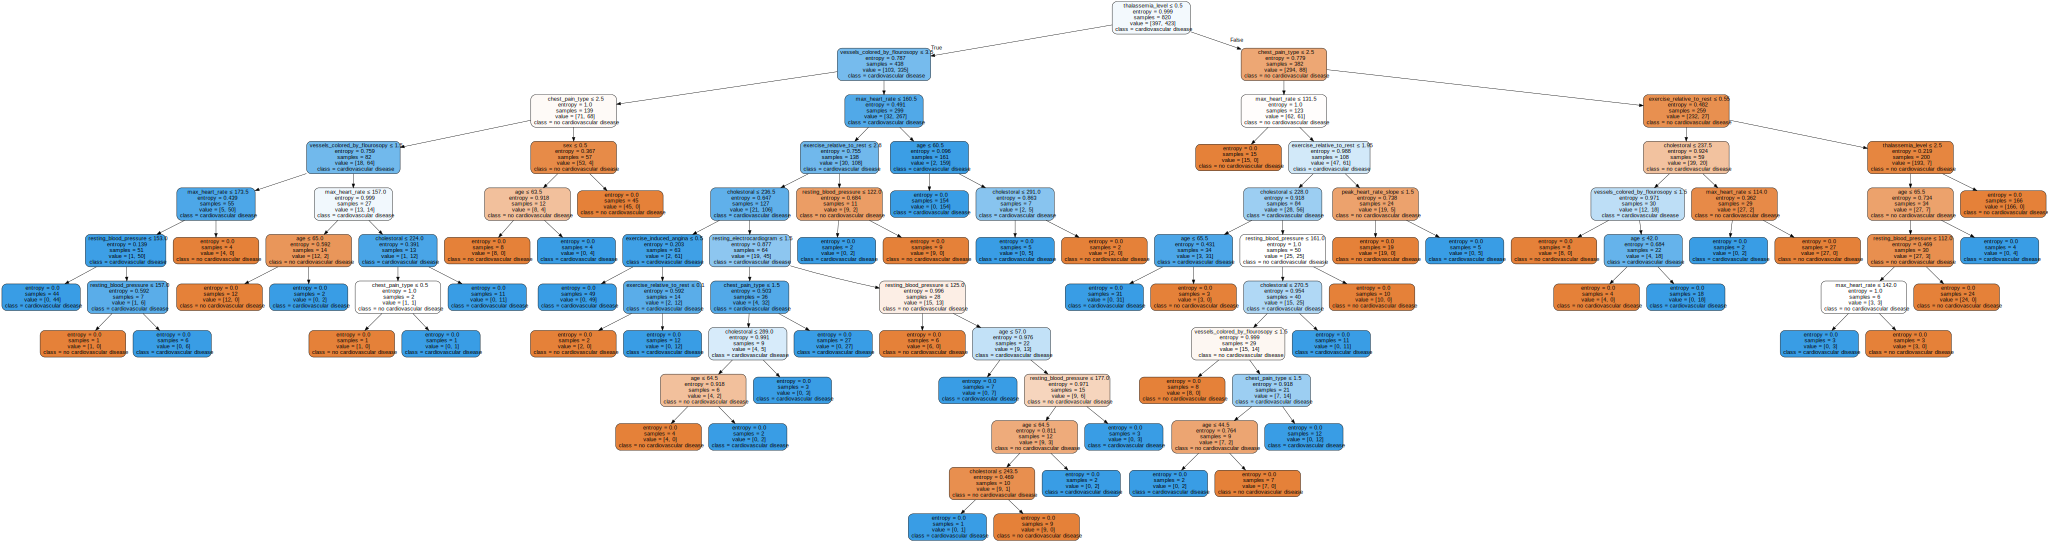

In [43]:
dot_data = tree.export_graphviz(cart_model, out_file= None,  
                               feature_names=['age', 'resting_blood_pressure', 'cholestoral', 'max_heart_rate',
       'exercise_relative_to_rest', 'sex', 'chest_pain_type',
       'fasting_blood_sugar', 'resting_electrocardiogram',
       'exercise_induced_angina', 'peak_heart_rate_slope',
       'vessels_colored_by_flourosopy', 'thalassemia_level'],
                               class_names = ['no cardiovascular disease','cardiovascular disease'],
                               filled = True, rounded=True, 
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Model Tunning (Show that the accuracy is highest at 12 nodes)

In [44]:
cart = tree.DecisionTreeClassifier(max_depth = 10)
cart_tuned = cart.fit(X_train, y_train)

y_pred = cart_tuned.predict(X_test)
crosscore_cart=accuracy_score(y_test, y_pred)
crosscore_cart

0.9707317073170731

In [62]:
cart = tree.DecisionTreeClassifier(max_depth = 12)
cart_tuned = cart.fit(X_train, y_train)

y_pred = cart_tuned.predict(X_test)
crosscore_cart=accuracy_score(y_test, y_pred)
crosscore_cart

0.9853658536585366

In [46]:
cart = tree.DecisionTreeClassifier(max_depth = 9)
cart_tuned = cart.fit(X_train, y_train)

y_pred = cart_tuned.predict(X_test)
crosscore_cart=accuracy_score(y_test, y_pred)
crosscore_cart

0.9707317073170731

## Result analysis

What is the difference if you change the size of the training data and parameters.
What is the ideal test size for data (Training and test data)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.1,random_state=42)

### Logistical Regression with test (10%)

In [71]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression( solver='liblinear')
model_1.fit(X_train, y_train.values.ravel())
lra=model_1.score(X_test, y_test)
lra

0.8155339805825242

### Decision Tree Classifier with test (10%)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
cart = DecisionTreeClassifier(criterion='entropy', random_state = 42)
cart_model = cart.fit(X_train, y_train)

In [65]:
y_pred = cart_model.predict(X_test)
testscore_cart=accuracy_score(y_test, y_pred)
cart = accuracy_score(y_test, y_pred)
cart

0.970873786407767

### Random Forest Classifier with test (10%)

In [66]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(criterion='entropy', random_state = 42)
model_forest.fit(X_train, y_train.values.ravel())
rfc=model_forest.score(X_test, y_test)
rfc

0.970873786407767